# TD-TP 7 -- Autoencodeurs 


> Ce TD-TP a pour objectif de construire un autoencodeur pour trois types d'applications : reconstruction, débruitage et détection d'anomaies sur différents jeux de données.



---


# **Partie I - Introducution : reconstruction**

## Téléchargez les librairies utiles :

In [14]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

## 2) Expliquez les lignes de code ci-dessous :

In [15]:
SIZE=256 # taille de l'image
img_data=[] #

img=cv2.imread('monalisa.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors

## 3) Donnez la dimesion de l'image.

In [16]:
print(f"dimension de l'image : {img.shape}")

dimension de l'image : (256, 256, 3)


In [17]:
img=cv2.resize(img,(SIZE, SIZE))   # redimentionner l'image sur SIZE
img_data.append(img_to_array(img)) # ajouter l'images à notre tableau

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))

## 4) Donnez le type et la dimension de de img_array.

In [18]:
print(f"Type de img_array     : {img_array.dtype}")
print(f"Dimension de im_array : {img_array.shape}")

Type de img_array     : float32
Dimension de im_array : (1, 256, 256, 3)


## 5) Normalisez les données disponibles dans img_array.

In [19]:
img_array = img_array.astype('float32') / 255.0

## 6) Expliquez l'architecture du réseau de neurones sur lequel vous serez amené à travailler (type de réseau, nombre de couches ...)

In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same')) 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

In [21]:
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

## 7) Configurez l'architecture avant la phase d'entraiement en choisissant : 
- la fonction de côut 'mean_squared_error', 
- l'optimization :  'adam'
- la métrique de mesure de la performance : 'accuracy'

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

## 8) Donnez un aperçu du modèle et analysez le réseau.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

## 9) Entrainez le modèle en prenant par exemple 20 épisodes. 

In [24]:
model.fit(img_array, img_array,epochs=20,shuffle=True)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.1316 - accuracy: 0.1369
Epoch 2/20
1/1 [==============================] - 0s 343ms/step - loss: 0.1266 - accuracy: 0.1274
Epoch 3/20
1/1 [==============================] - 0s 310ms/step - loss: 0.1206 - accuracy: 0.1267
Epoch 4/20
1/1 [==============================] - 0s 280ms/step - loss: 0.1142 - accuracy: 0.1271
Epoch 5/20
1/1 [==============================] - 0s 305ms/step - loss: 0.1069 - accuracy: 0.1267
Epoch 6/20
1/1 [==============================] - 0s 279ms/step - loss: 0.0993 - accuracy: 0.1254
Epoch 7/20
1/1 [==============================] - 0s 268ms/step - loss: 0.0923 - accuracy: 0.1243
Epoch 8/20
1/1 [==============================] - 0s 268ms/step - loss: 0.0873 - accuracy: 0.1241
Epoch 9/20
1/1 [==============================] - 0s 320ms/step - loss: 0.0853 - accuracy: 0.1241
Epoch 10/20
1/1 [==============================] - 0s 250ms/step - loss: 0.0831 - accuracy: 0.1241
Epoch 11/20
1/1 [=====

## 10) Prédisez le modèle.

In [25]:
print("Neural network output")
pred = model.predict(img_array)

Neural network output


## 11) Affichez l'image prédite puis commentez le résultat.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


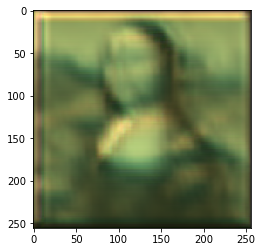

In [26]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

Nous avons la bonne forme de l'image, mais elle reste de même un peu flou

## 12) Augmentez le nombre d'épisode et analysez les images prédites obtenues.

Epoch 1/1000
1/1 [==============================] - 0s 265ms/step - loss: 0.0190 - accuracy: 0.2746
Epoch 2/1000
1/1 [==============================] - 0s 279ms/step - loss: 0.0153 - accuracy: 0.3289
Epoch 3/1000
1/1 [==============================] - 0s 296ms/step - loss: 0.0135 - accuracy: 0.4141
Epoch 4/1000
1/1 [==============================] - 0s 285ms/step - loss: 0.0139 - accuracy: 0.4764
Epoch 5/1000
1/1 [==============================] - 0s 292ms/step - loss: 0.0149 - accuracy: 0.5161
Epoch 6/1000
1/1 [==============================] - 0s 276ms/step - loss: 0.0154 - accuracy: 0.5550
Epoch 7/1000
1/1 [==============================] - 0s 282ms/step - loss: 0.0152 - accuracy: 0.5785
Epoch 8/1000
1/1 [==============================] - 0s 277ms/step - loss: 0.0147 - accuracy: 0.5924
Epoch 9/1000
1/1 [==============================] - 0s 261ms/step - loss: 0.0143 - accuracy: 0.5991
Epoch 10/1000
1/1 [==============================] - 0s 287ms/step - loss: 0.0139 - accuracy: 0.6010

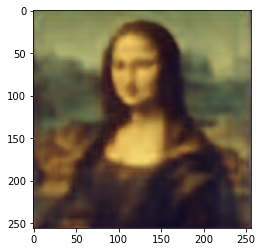

In [27]:
model.fit(img_array, img_array,epochs=1000,shuffle=True);
pred = model.predict(img_array)
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")


Nous avons une image de plus clair et nette avec une augmentation du nombre epoch d'entrainement

# **Partie II - Débruitage d'images**

L'objectif de cette partie est de débruiter des images en utilisant un autoencodeur. Vous travaillerez avec le jeu de données MNIST.

---

## 1) Téléchargez le jeu de données MNIST

In [28]:
from tensorflow.keras.datasets import mnist

In [29]:
(x_train, _), (x_test, _) = mnist.load_data()

## 2) Donnez les dimensions du jeu de données ainsi que la taille des images. Normalisez ensuite les images.

In [30]:
print(f"Dimension du jeu de données : {x_train.shape}")

Dimension du jeu de données : (60000, 28, 28)


In [31]:
x_train.dtype

dtype('uint8')

Nous avons donc des images de taille 28 par 28

In [32]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
x_test.shape

(10000, 28, 28)

## 3) Expliquez les lignes ci-dessous :

In [35]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # redimentionner les données sur 28 par 28 avec une profondeur de 1
# x_train = x_train.reshape(-1, 28, 28, 1)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [36]:
x_train.shape

(60000, 28, 28, 1)

## 4) On souhaite construire à partir des images MNIST non-bruités des imges bruitées (bruit Gaussien) comme suit : 

In [37]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

## 5) Affichez une dizaine d'images bruitées :

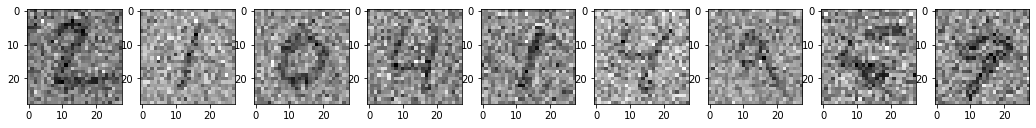

In [38]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

## 6) Expliquez l'intérêt des lignes de code ci-dessous :

In [39]:
# un type d'égalisation
x_train_noisy = np.clip(x_train_noisy, 0., 1.) #  écrêtées sur les valeurs entre 0 et 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.) #  écrêtées sur les valeurs entre 0 et 1

## 7) Affichez une dizaine d'images bruitées puis commentez.

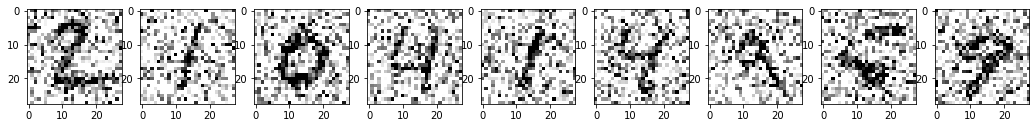

In [40]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

Nous avons des images bien ecreter d'une image à une autre

## 8) Expliquez l'architecture du réseau de neuronnes sur lequel vous serez amené à travailler (type de réseau, nombre de couches ...)

In [41]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

Nous un modèle sequentiel, avec en entré une image de 28 pixel par 28 et pour chaque pixel un vecteur de une seule composante (28, 28, 1)  
ensuite on met 32 plan convolutif avec un kernel (3,3) avec une fonction d'activation relu  
un maxPolling avec une fenetre (2,2) ce qui reduit la taille de 2

## 9) Configurez l'architecture avant la phase d'entraiement en choisissant : 
- la fonction de côut 'mean_squared_error', 
- l'optimization :  'adam'
- la métrique de mesure de la performance : 'accuracy'Nouvelle section

In [42]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])


## 10) Donnez un aperçu du modèle et analysez le réseau.

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)         

Nous un modèle sequentiel, avec en entré une image de 28 pixel par 28 et pour chaque pixel un vecteur de une seule composante (28, 28, 1)  
ensuite on met 32 plan convolutif avec un kernel (3,3) avec une fonction d'activation relu  
un maxPolling avec une fenetre (2,2) ce qui reduit la taille de 2, ce qui est visible car on passe de 28 par 28 à 14 par 14 sur la deuxième "summary"  
la même procédure pour le reste et au final un UpSampling, qui est l'operation inverse de l'echantillonnage.

## 11) Entrainez le modèle en utilisant par exemple 10 episodes et un batch_size de 256.

In [44]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
235/235 [==============================] - 130s 547ms/step - loss: 0.0506 - accuracy: 0.7986
Epoch 2/10
235/235 [==============================] - 138s 587ms/step - loss: 0.0357 - accuracy: 0.8012
Epoch 3/10
235/235 [==============================] - 141s 600ms/step - loss: 0.0314 - accuracy: 0.8035
Epoch 4/10
235/235 [==============================] - 142s 604ms/step - loss: 0.0289 - accuracy: 0.8049
Epoch 5/10
235/235 [==============================] - 141s 601ms/step - loss: 0.0273 - accuracy: 0.8058
Epoch 6/10
235/235 [==============================] - 141s 601ms/step - loss: 0.0261 - accuracy: 0.8064
Epoch 7/10
235/235 [==============================] - 142s 603ms/step - loss: 0.0252 - accuracy: 0.8069
Epoch 8/10
235/235 [==============================] - 140s 597ms/step - loss: 0.0246 - accuracy: 0.8072
Epoch 9/10
235/235 [==============================] - 140s 596ms/step - loss: 0.0239 - accuracy: 0.8075
Epoch 10/10
235/235 [==============================] - 140s 596m

## 12) Evaluez, sauvegardez (denoising_autoencoder.model) le modèle.

In [45]:
model.evaluate(x_test_noisy, x_test)

model.save('denoising_autoencoder.model')

313/313 [==============================] - 7s 22ms/step - loss: 0.0228 - accuracy: 0.8072
INFO:tensorflow:Assets written to: denoising_autoencoder.model\assets


## 13) Prédisez puis affichez une dizaine d'images bruitées que vous comparerez à leurs  versions débruitées par l'autoencodeur.

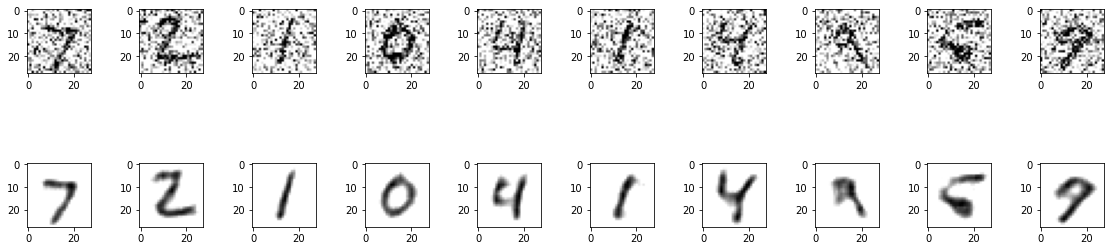

In [46]:
no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

Nous avons bien un bon debrouitage, ce qui est très visible sur l'image ci-dessus

# **Partie III -- Détection d'anomalies**
L'objectif de cette partie est déceler une anomalie dans les données en utilsant un autoencodeur. 

## 1) Lisez et analysez le fichier csv. Que contient df ?

In [47]:
import pandas as pd
df = pd.read_csv('anomaly.csv')

print(df.head())
print(df.groupby('Quality')['Quality'].count())

       Date  Power  Detector Quality
0  1-Jan-16     96         8    Good
1  2-Jan-16     96        10    Good
2  3-Jan-16     91         8    Good
3  4-Jan-16     97         9    Good
4  5-Jan-16     91        11    Good
Quality
Bad      407
Good    1054
Name: Quality, dtype: int64


## 2) Nettoyez le fichier anomaly.csv (supprimer 'Date')

In [48]:
df=df.drop(['Date'],axis=1)

In [49]:
df.head()

Power  Detector Quality
0     96         8    Good
1     96        10    Good
2     91         8    Good
3     97         9    Good
4     91        11    Good

Plus de colonne Date

## 3) Préparez le jeu de données en expliquant les différentes lignes de code ci-dessous : 

In [50]:
#COnvert non-numeric to numeric
df.Quality[df.Quality == 'Good'] = 1 # on replace le string en numeric pour les calculs
df.Quality[df.Quality == 'Bad'] = 2

C:\Users\pivot\AppData\Local\Temp/ipykernel_15640/3377140904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality == 'Good'] = 1 # on replace le string en numeric pour les calculs
C:\Users\pivot\AppData\Local\Temp/ipykernel_15640/3377140904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality == 'Bad'] = 2


In [51]:
# Séparation des données "good" des données "bad"
good_mask = df['Quality']== 1 
bad_mask = df['Quality']== 2 

df.drop('Quality',axis=1,inplace=True)
df_good = df[good_mask]
df_bad = df[bad_mask]

print(f"Good count: {len(df_good)}")
print(f"Bad count: {len(df_bad)}")

# Jeu de données
x_good = df_good.values
x_bad = df_bad.values

Good count: 1054
Bad count: 407


## 4) Préparez le jeu de données d'entrainement et de test.

In [52]:
from sklearn.model_selection import train_test_split

x_good_train, x_good_test = train_test_split(
        x_good, test_size=0.25, random_state=42)

print(f"Good train count: {len(x_good_train)}")
print(f"Good test count: {len(x_good_test)}")

Good train count: 790
Good test count: 264


## 5) Expliquez l'architecture du réseau décrite ci-dessous. Identifiez le type de réseau de neurones.

In [53]:
model = Sequential()
model.add(Dense(10, input_dim=x_good.shape[1], activation='relu')) # couche de 10 neuronnes avec une activation relu
model.add(Dense(3, activation='relu')) # couche de 3 neuronnes avec la fonction d'activation relu
model.add(Dense(10, activation='relu')) # couche de 10 neuronnes avec une fonction d'activation relu
model.add(Dense(x_good.shape[1])) 

Nous avons une classification binaire

## 6) Configurez l'architecture avant la phase d'entraiement en choisissant :
- la fonction de côut 'mean_squared_error',
- l'optimization : 'adam'
- la métrique de mesure de la performance : 'accuracy'

In [54]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

## 7) Donnez un aperçu du modèle et analysez le réseau.

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


## 8) Entrainez le modèle en utilisant par exemple 100 episodes et un batch_size de XXX. 

In [56]:
model.fit(x_good_train, x_good_train, epochs=100, batch_size=256, shuffle=True)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 4511.3433 - accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 4495.2690 - accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 4477.9824 - accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 4459.3481 - accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 4439.2866 - accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 4417.5571 - accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 4394.1577 - accuracy: 1.0000
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 4368.8208 - accuracy: 1.0000
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 4341.4741 - accuracy: 1.0000
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 4311.8936 - accuracy: 1.0000

## 9) Evaluez le modèle entrainé. Affichez et interprétez les scores obtenus.

In [57]:
pred = model.predict(x_good_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_good_test))

pred = model.predict(x_good)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_good))

pred = model.predict(x_bad)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_bad))


In [65]:
print(f"Scorex x_good test SQRT MSE : {score1}")
print(f"Scorex x_good      SQRT MSE : {score2}")
print(f"Scorex x_bad       SQRT MSE : {score3}")


Scorex x_good test SQRT MSE : 1.5964587984378027
Scorex x_good      SQRT MSE : 1.591833714231045
Scorex x_bad       SQRT MSE : 4.099162617671315


Il n'ya pas une grande difference pour la performance de notre modèle avec le train set, test set, x_bad